Columns:

RI: refractive index  
NA: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)  
Mg: Magnesium  
Al: Aluminum  
K: Potassium  
Ca: Calcium  
Ba: Barium  
Fe: Iron  
Type of glass:
- 1 building_windows_float_processed  
- 2 building_windows_non_float_processed  
- 3 vehicle_windows_float_processed  
- 4 vehicle_windows_non_float_processed (none in this database)  
- 5 containers  
- 6 tableware  
- 7 headlamps  

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [31]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [33]:
df.shape

(214, 10)

In [34]:
# count of various type
df.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [35]:
# we do not need type column for clustering so let's drop it
df.drop('Type', axis=1, inplace=True)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [36]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [37]:
df['ID'] = 100+df.index

In [38]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,100
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,101
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,102
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,103
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,104


In [39]:
# missing value check
df.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
ID    0
dtype: int64

In [40]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'ID'], dtype='object')

In [41]:
# ignoring ID columns from analysis
f = df.columns[:-1]
f

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object')

In [42]:
list(enumerate(f))

[(0, 'RI'),
 (1, 'Na'),
 (2, 'Mg'),
 (3, 'Al'),
 (4, 'Si'),
 (5, 'K'),
 (6, 'Ca'),
 (7, 'Ba'),
 (8, 'Fe')]

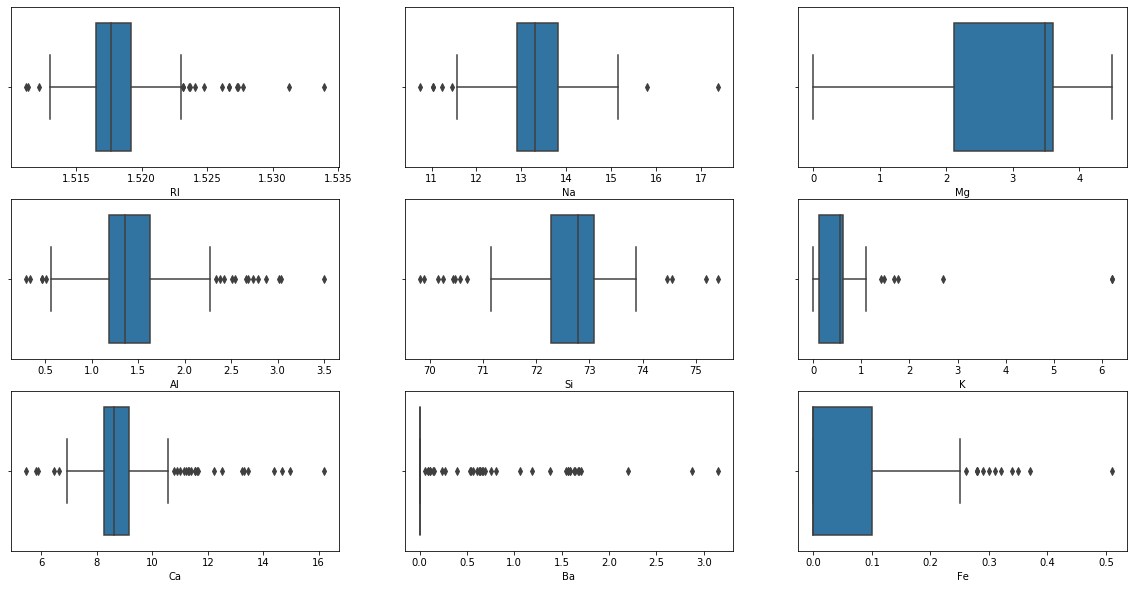

In [43]:
# plot boxplot using subplot
plt.figure(figsize=[20,10])
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1], data=df)

In [44]:
# outlier treatment
f = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for i in f:
    q1 = df[i].quantile(0.01)
    q4 = df[i].quantile(0.99)
    
    df[i][df[i]<=q1] = q1
    df[i][df[i]>=q4] = q4

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
df.shape

(214, 10)

In [46]:
# data scaling

# instantiate scaler
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df.drop('ID', axis=1))
df_scaled.shape

(214, 9)

In [47]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns[:-1]
df_scaled.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.950549,0.319899,0.893132,-0.707909,-1.170586,-1.021903,-0.147013,-0.367626,-0.597741
1,-0.255286,0.647661,0.639148,-0.172494,0.112257,0.044327,-0.817870,-0.367626,-0.597741
2,-0.762446,0.175684,0.604337,0.198179,0.463350,-0.184151,-0.854329,-0.367626,-0.597741
3,-0.237553,-0.243851,0.701809,-0.316644,-0.049787,0.272804,-0.533485,-0.367626,-0.597741
4,-0.322671,-0.165188,0.653073,-0.419608,0.584883,0.222032,-0.642864,-0.367626,-0.597741


In [49]:
# check the hopkins statistics
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [50]:
hopkins(df_scaled)

0.8840083951352569

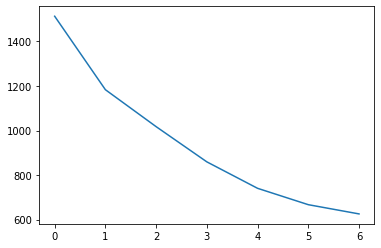

In [52]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# print(ssd)
plt.plot(ssd)
plt.show()

In [59]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
sil=[]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    sil.append([num_clusters,silhouette_avg])
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4058217949579743
For n_clusters=3, the silhouette score is 0.3673729456231893
For n_clusters=4, the silhouette score is 0.3887567910894662
For n_clusters=5, the silhouette score is 0.34993726854791846
For n_clusters=6, the silhouette score is 0.3320112996972162
For n_clusters=7, the silhouette score is 0.34478917862783093
For n_clusters=8, the silhouette score is 0.3490289998058942


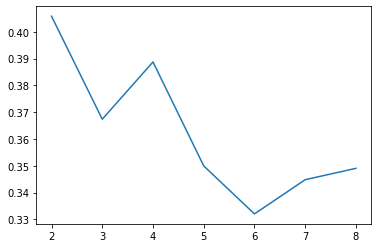

In [61]:
sil = pd.DataFrame(sil)
plt.plot(sil[0],sil[1])
plt.show()

In [64]:
# final model with k=3
kmeans = KMeans(n_clusters=3, random_state=0, max_iter=50)
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [65]:
kmeans.labels_

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [66]:
# assign the label to original df
df['cluster_id'] = kmeans.labels_
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,ID,cluster_id
0,1.52101,13.64,3.9648,1.10,71.78,0.06,8.75,0.0,0.0,100,2
1,1.51761,13.89,3.6000,1.36,72.73,0.48,7.83,0.0,0.0,101,0
2,1.51618,13.53,3.5500,1.54,72.99,0.39,7.78,0.0,0.0,102,0
3,1.51766,13.21,3.6900,1.29,72.61,0.57,8.22,0.0,0.0,103,0
4,1.51742,13.27,3.6200,1.24,73.08,0.55,8.07,0.0,0.0,104,0


In [67]:
df.isnull().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
ID            0
cluster_id    0
dtype: int64

In [68]:
# Cluster profiling
df.cluster_id.value_counts()

0    135
2     50
1     29
Name: cluster_id, dtype: int64

In [69]:
df.groupby('cluster_id')[['Ca', 'Fe', 'K', 'Ba']].mean()

,Ca,Fe,K,Ba
cluster_id,,,,
0,8.414356,0.062721,0.617284,0.016148
1,8.478138,0.013448,0.171724,0.989055
2,10.676816,0.063174,0.213400,0.095526


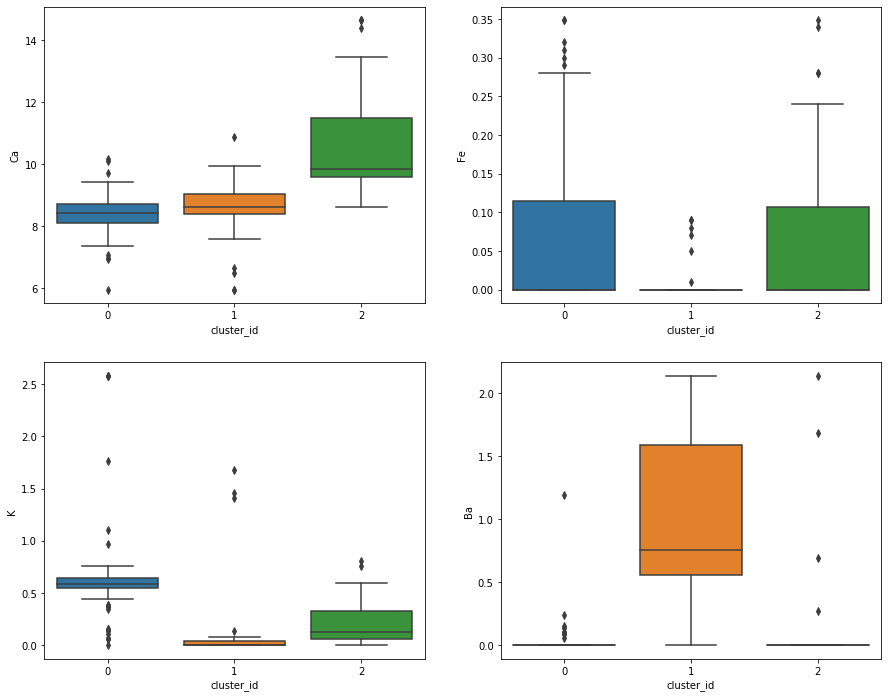

In [71]:
f = ['Ca', 'Fe', 'K', 'Ba']
# plot boxplot using subplot
plt.figure(figsize=[15,12])
for i in enumerate(f):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(x='cluster_id', y=i[1], data=df)

cluster 0 = Rich in Potassium and Iron  
cluster 1 = Rich in Barium  
cluster 2 = Rich in Calcium and Iron  